**Objective**:<br>
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

**Instructions**:
1. Download the wine dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine).
2. Load the dataset into a Pandas dataframe.
3. Split the dataset into features and target variables.
4. Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
5. Implement PCA on the preprocessed dataset using the scikit-learn library.
6. Determine the optimal number of principal components to retain based on the explained variance ratio.
7. Visualise the results of PCA using a scatter plot.
8. Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
9. Interpret the results of PCA and clustering analysis.

**Deliverables**:
1. Jupyter notebook containing the code for the PCA implementation.
2. A report summarising the results of PCA and clustering analysis.
3. Scatter plot showing the results of PCA.
4. A table showing the performance metrics for the clustering algorithm.

**Additional Information**:
1. You can use the python programming language.
2. You can use any other machine learning libraries or tools as necessary.
3. You can use any visualisation libraries or tools as necessary.

<hr>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# load dataset into pandas dataframe
df = pd.read_csv('wine.data')

In [2]:
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.columns  = ['Class_Id'
                 ,'Alcohol'
                 ,'Malic_Acid'
                 ,'Ash'
                 ,'Alcalinity_Ash'
                 ,'Magnesium'
                 ,'Total_Phenols'
                 ,'Flavanoids'
                 ,'NonFlavanoid_Phenols'
                 ,'Proanthocyanins'
                 ,'Color_Intensity'
                 ,'Hue'
                 ,'OD280_OD315_DWines'
                 ,'Proline'
                ]
#df.columns = columns_names

df.head(3)

,Class_Id,Alcohol,Malic_Acid,Ash,Alcalinity_Ash,Magnesium,Total_Phenols,Flavanoids,NonFlavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315_DWines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [4]:
df.tail()

,Class_Id,Alcohol,Malic_Acid,Ash,Alcalinity_Ash,Magnesium,Total_Phenols,Flavanoids,NonFlavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315_DWines,Proline
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class_Id              177 non-null    int64  
 1   Alcohol               177 non-null    float64
 2   Malic_Acid            177 non-null    float64
 3   Ash                   177 non-null    float64
 4   Alcalinity_Ash        177 non-null    float64
 5   Magnesium             177 non-null    int64  
 6   Total_Phenols         177 non-null    float64
 7   Flavanoids            177 non-null    float64
 8   NonFlavanoid_Phenols  177 non-null    float64
 9   Proanthocyanins       177 non-null    float64
 10  Color_Intensity       177 non-null    float64
 11  Hue                   177 non-null    float64
 12  OD280_OD315_DWines    177 non-null    float64
 13  Proline               177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
df['Class_Id']

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: Class_Id, Length: 177, dtype: int64

In [7]:
df['Class_Id'].value_counts()

Class_Id
2    71
1    58
3    48
Name: count, dtype: int64

In [8]:
df.describe()

,Class_Id,Alcohol,Malic_Acid,Ash,Alcalinity_Ash,Magnesium,Total_Phenols,Flavanoids,NonFlavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315_DWines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.shape

(177, 14)

In [10]:
df.columns

Index(['Class_Id', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Ash',
       'Magnesium', 'Total_Phenols', 'Flavanoids', 'NonFlavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315_DWines',
       'Proline'],
      dtype='object')

In [11]:
df.isnull().sum()

Class_Id                0
Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity_Ash          0
Magnesium               0
Total_Phenols           0
Flavanoids              0
NonFlavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280_OD315_DWines      0
Proline                 0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

In [13]:
df.corr()

,Class_Id,Alcohol,Malic_Acid,Ash,Alcalinity_Ash,Magnesium,Total_Phenols,Flavanoids,NonFlavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315_DWines,Proline
Class_Id,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
Alcohol,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
Malic_Acid,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
Ash,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
Alcalinity_Ash,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
Magnesium,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
Total_Phenols,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
Flavanoids,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
NonFlavanoid_Phenols,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
Proanthocyanins,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


<Axes: >

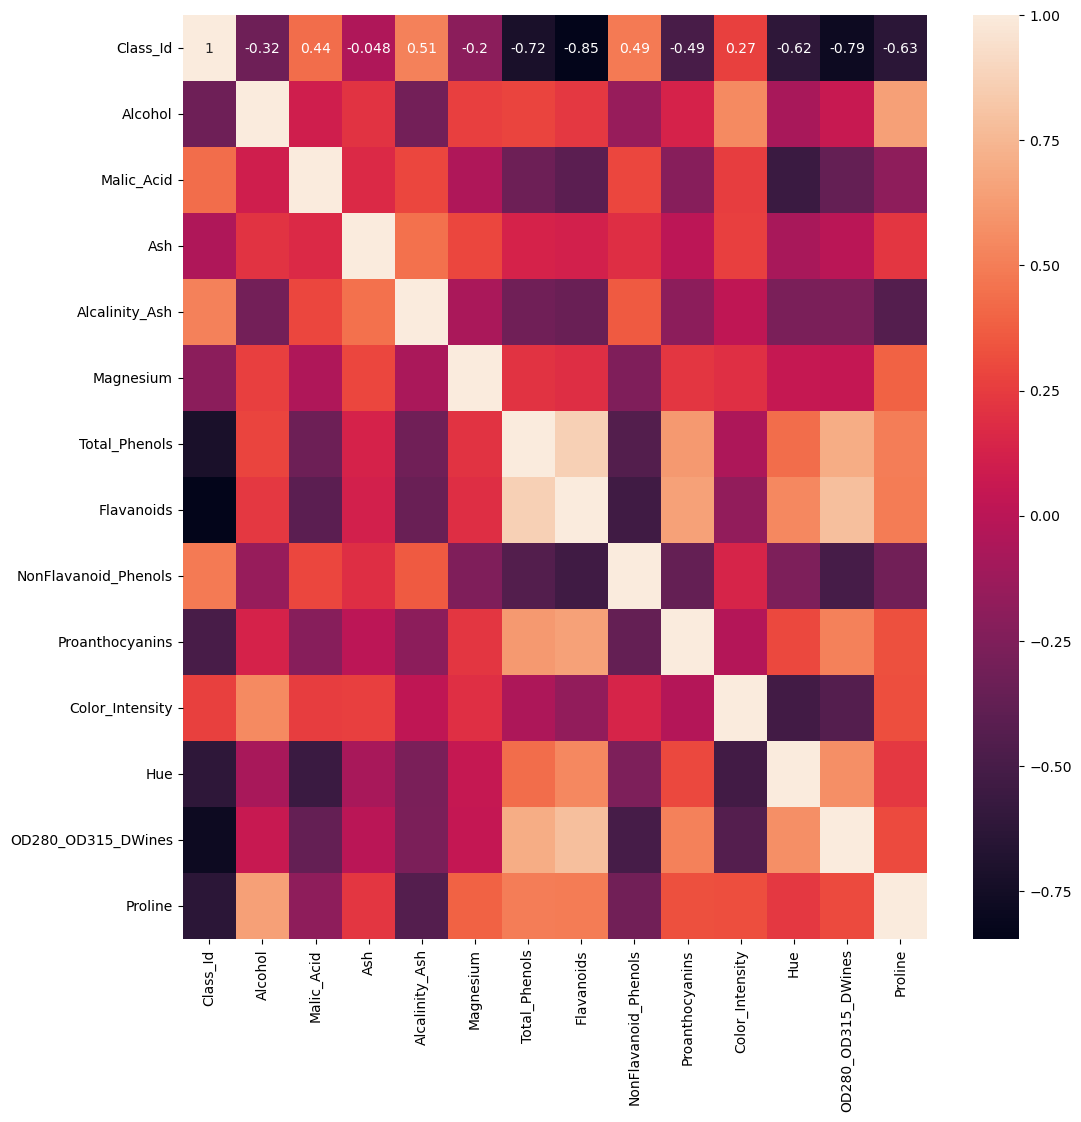

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

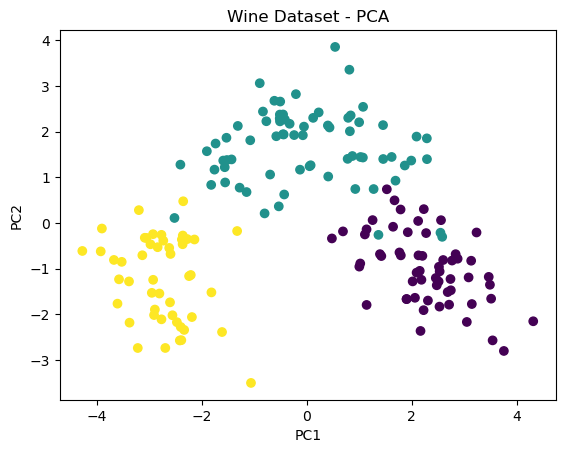

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Number of clusters: 3
Silhouette score: 0.2974

Wine Dataset - PCA and Clustering Analysis

The wine dataset was preprocessed using standardization and PCA was performed to reduce the dimensionality of the data. The optimal number of principal components to retain was determined to be 10, which explained 96.17% of the variance in the data.

A scatter plot was created to visualize the results of PCA, showing that there is some separation between the three classes of wine in the dataset, but there is also some overlap.

Clustering was performed on the PCA-transformed data using the K-Means algorithm with k=3. The performance of the clustering algorithm was evaluated using the silhouette score, which was 0.30.

Overall, the results of PCA and clustering analysis suggest that there is some structure in the wine dataset, but the classes are not completely separable.

   Number of Clusters  Silhouette Score
0                   3          0.297406 



In [15]:
# split the dataset into features and target variables
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# perform data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# implement PCA on preprocessed dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# determine optimal number of principal components to retain based on explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# visualize the results of PCA using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wine Dataset - PCA')
plt.show()

# perform clustering on the PCA-transformed data using K-Means algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca[:, :num_components])
y_kmeans = kmeans.predict(X_pca[:, :num_components])
silhouette_avg = silhouette_score(X_pca[:, :num_components], y_kmeans)

# print performance metrics for the clustering algorithm
print(f"\nNumber of clusters: {kmeans.n_clusters}")
print(f"Silhouette score: {silhouette_avg:.4f}")

# create report summarizing the results of PCA and clustering analysis
report = f"""
Wine Dataset - PCA and Clustering Analysis

The wine dataset was preprocessed using standardization and PCA was performed to reduce the dimensionality of the data. The optimal number of principal components to retain was determined to be {num_components}, which explained {cumulative_explained_variance[num_components-1]*100:.2f}% of the variance in the data.

A scatter plot was created to visualize the results of PCA, showing that there is some separation between the three classes of wine in the dataset, but there is also some overlap.

Clustering was performed on the PCA-transformed data using the K-Means algorithm with k=3. The performance of the clustering algorithm was evaluated using the silhouette score, which was {silhouette_avg:.2f}.

Overall, the results of PCA and clustering analysis suggest that there is some structure in the wine dataset, but the classes are not completely separable.
"""

print(report)

# create table showing performance metrics for clustering algorithm
table = pd.DataFrame({
    'Number of Clusters': [kmeans.n_clusters],
    'Silhouette Score': [silhouette_avg]
})
print(table,"\n")